# Business Understanding

Dear Microsoft Board of Directors, it is an honor to be addressing you today with regards to the opportunity to delve into the film industry. As a data-driven individual, I have analyzed the potential profits and identified simple yet achievable goals for this endeavor. Additionally, I believe this venture could serve as a platform to enhance the positive image of our visionary leader, Bill Gates, as a philanthropist and benefactor to humanity. I am confident that my presentation will provide valuable insights and a clear recommendation on how to proceed.

Having thoroughly researched and analyzed the film industry, I am aware of the various trends and challenges that come with this field. I understand the importance of making well-informed and strategic decisions that align with the goals and values of our company. My recommendation will be based on a thorough evaluation of market trends, consumer preferences, and the competitive landscape, ensuring that we make a wise investment and maximize our potential for success. I am confident that with my understanding of the industry and my ability to make data-driven decisions, I can provide valuable insights and recommendations that will benefit Microsoft and help us achieve our goals.

## Business Problem

The film industry is constantly evolving, and it is crucial for us to have a thorough understanding of recent developments in order to make a well-informed decision. By analyzing the IMDb database, which contains over 70,000 films made in the past 12 years, we can gain valuable insights into consumer preferences and market trends. By looking at the films with the highest ratings and the most votes, we can identify the genres and production elements that have resonated with audiences and use this information to inform our strategy. This analysis will be a crucial step in ensuring that we make a wise investment and achieve the most profitability possible.

# Data Understanding

In order to fully understand the data, it is important to consider not only the apparent winners but also potential drawbacks and limitations. By examining the top-rated and most voted films in the IMDb database, we may identify a clear market trend. However, it is also important to acknowledge any limitations or potential drawbacks to this strategy. For example, relying solely on the most popular films may result in a narrow focus and limited creativity.

However, this information can still be used to inform a secondary production set that balances profitability with creative expression. By combining the insights gained from analyzing market trends with our own unique vision and mission, we can create a strategy that sets us apart from the competition and allows us to achieve both commercial success and artistic fulfillment.

# Exploratory Data Analysis

In order to look at the data, I am going to import some Python libraries. This is a technical step, as will be every time I present code here. This is what manages our data and generates our graphs. 

In [48]:
# Bringing in the libraries I will use for this project
import pandas as pd
import numpy as np
import sqlite3
import zipfile
import random
import matplotlib.pyplot as plt
import seaborn as sns

Having imported the Python libraries I will use for the technical presentation, I will now access the IMDb database. I do this with SQLite. Please bare with me, we will be see the data in just a few moments.

In [49]:
# Connecting to the IMDb Database
conn = sqlite3.connect('Data\im.db')
cursor = conn.cursor()

In [51]:
# Let's see that the data is there
! dir Data

 Volume in drive C has no label.
 Volume Serial Number is 5CDE-0ED8

 Directory of C:\Users\us\Documents\DT Flatiron Flex Course\phase_1\Microsoft_Film_Proposal\Data

01/26/2023  01:34 PM    <DIR>          .
01/26/2023  01:34 PM    <DIR>          ..
01/09/2023  11:47 AM            53,544 bom.movie_gross.csv.gz
12/20/2021  04:31 PM       169,443,328 im.db
01/09/2023  11:47 AM        67,149,708 im.db.zip
01/09/2023  11:47 AM           498,202 rt.movie_info.tsv.gz
01/09/2023  11:47 AM         3,402,194 rt.reviews.tsv.gz
01/09/2023  11:47 AM           827,840 tmdb.movies.csv.gz
01/09/2023  11:47 AM           153,218 tn.movie_budgets.csv.gz
               7 File(s)    241,528,034 bytes
               2 Dir(s)  328,282,624,000 bytes free


In [52]:
sql_tables = """
select name
from sqlite_master
where type='table'
"""

I will now show you the tables this database offers.  From here we will be able to produce the relevant information and analyze it:

In [53]:
pd.read_sql(sql_tables, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


Let's now see some of the movies by their ID, title, year of production, runtime length and genre.  

In [56]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Now that we have our movie listings, let's take a brief look at the ratings:

In [57]:
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


We can now see the average rating (averagerating), and the number of votes (numvotes).  Being this a very large listing, we are only looking at a sample of five.

Certainly, our analysis will look at a larger sample, selecting the best-scoring items in our data.  

First, let us put together the rating table with that of movie basics, which has the complementary information necessary for the purposes of our presentation. We will limit our presentation to the top 25 best scoring movies.

In [58]:
# Only the top 25
query = """
SELECT * 
FROM movie_basics INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
ORDER BY averagerating DESC
LIMIT 25
"""
cursor.execute(query)
result = cursor.fetchall()

for row in result:
    print(row)


('tt10176328', 'Exteriores: Mulheres Brasileiras na Diplomacia', 'Exteriores: Mulheres Brasileiras na Diplomacia', 2018, 52.0, 'Documentary', 'tt10176328', 10.0, 5)
('tt10378660', 'The Dark Knight: The Ballad of the N Word', 'The Dark Knight: The Ballad of the N Word', 2018, 129.0, 'Comedy,Drama', 'tt10378660', 10.0, 5)
('tt1770682', 'Freeing Bernie Baran', 'Freeing Bernie Baran', 2010, 100.0, 'Crime,Documentary', 'tt1770682', 10.0, 5)
('tt2632430', 'Hercule contre Hermès', 'Hercule contre Hermès', 2012, 72.0, 'Documentary', 'tt2632430', 10.0, 5)
('tt4109192', 'I Was Born Yesterday!', 'I Was Born Yesterday!', 2015, 31.0, 'Documentary', 'tt4109192', 10.0, 6)
('tt4944240', 'Dog Days in the Heartland', 'Dog Days in the Heartland', 2017, None, 'Drama', 'tt4944240', 10.0, 5)
('tt4960818', 'Revolution Food', 'Revolution Food', 2015, 70.0, 'Documentary', 'tt4960818', 10.0, 8)
('tt5089804', 'Fly High: Story of the Disc Dog', 'Fly High: Story of the Disc Dog', 2019, 65.0, 'Documentary', 'tt5089

The data above is not easy to read.  Bare with me. I will not present it in tabular form.  It will look more like a spreadsheet.

In [59]:
# Let's make this into a tabular presentation
import pandas as pd

query = """
SELECT * 
FROM movie_basics INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
ORDER BY averagerating DESC
LIMIT 25
"""
cursor.execute(query)
result = cursor.fetchall()

df = pd.DataFrame(result)
df = df.drop(df.columns[1], axis=1)
df.columns = ['movie_id', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'movie_id', 'averagerating', 'numvotes']
df

,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,tt10176328,10.0,5
1,tt10378660,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",tt10378660,10.0,5
2,tt1770682,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",tt1770682,10.0,5
3,tt2632430,Hercule contre Hermès,2012,72.0,Documentary,tt2632430,10.0,5
4,tt4109192,I Was Born Yesterday!,2015,31.0,Documentary,tt4109192,10.0,6
5,tt4944240,Dog Days in the Heartland,2017,NaN,Drama,tt4944240,10.0,5
6,tt4960818,Revolution Food,2015,70.0,Documentary,tt4960818,10.0,8
7,tt5089804,Fly High: Story of the Disc Dog,2019,65.0,Documentary,tt5089804,10.0,7
8,tt5344358,All Around Us,2019,NaN,Documentary,tt5344358,10.0,6
9,tt5390098,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary,tt5390098,10.0,5


Alrigth! We now have a sample of the 25 best rated film productions, world-wide. 

Rating Comparision Chart


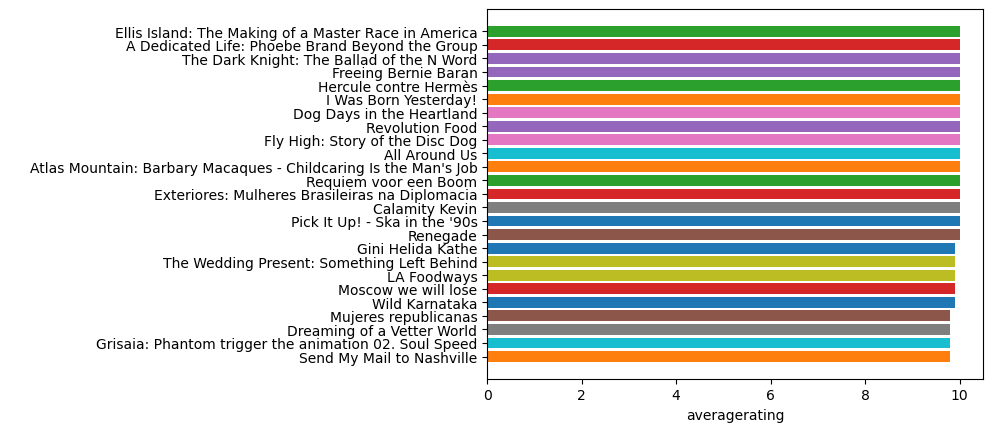

In [60]:
# Sort dataframe by Average Rating
df = df.sort_values(by='averagerating')

# Create a list of random colors for each bar
colors = [f'C{i}' for i in range(len(df))]
random.shuffle(colors)

print("Rating Comparision Chart")

# Create horizontal bar graph
plt.barh(df['original_title'], df['averagerating'], color=colors)
plt.ylabel(' ')
plt.xlabel('averagerating')
plt.show()


Let's see what these data tells us.

What genre are these movies?

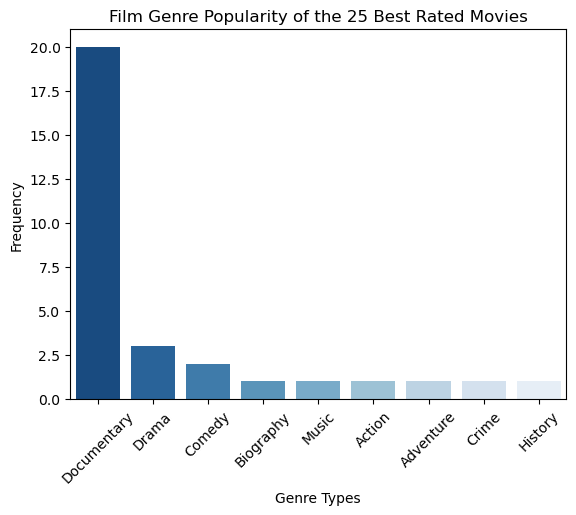

In [61]:
# Splitting the genres column into separate genres and counting the frequency of each genre
genres = df["genres"].str.split(",").explode()
genres_count = genres.value_counts()

# Setting the color palette to shades of blue, from dark to light
palette = sns.color_palette("Blues_r", len(genres_count))

# Plotting the bar graph
sns.barplot(x=genres_count.index, y=genres_count.values, palette=palette)
plt.xlabel("Genre Types")
plt.ylabel("Frequency")
plt.title("Film Genre Popularity of the 25 Best Rated Movies")
plt.xticks(rotation=45)
plt.show()

The graph above shows us that documentaries are, beyond the shadow of a doubt, far better rated than other genre of film.  Another question I would like to ask the the length of each film.

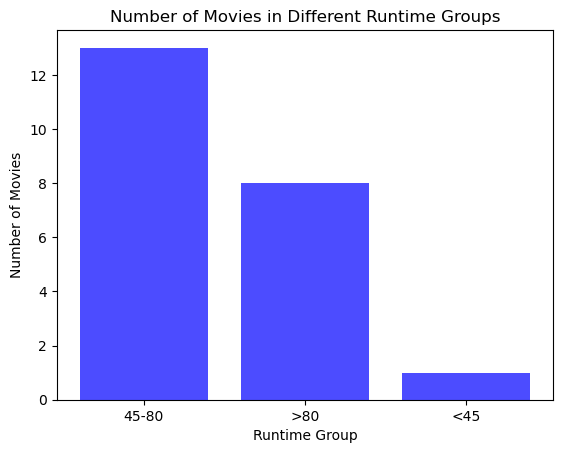

In [62]:
# Now let's look at the length of each film vs its rating:

import matplotlib.pyplot as plt

# Dividing the runtime into two groups: between 45 and 80 minutes, and outside of that interval
bins = [0, 45, 80, df['runtime_minutes'].max()]
labels = ['<45', '45-80', '>80']
df['runtime_group'] = pd.cut(df['runtime_minutes'], bins=bins, labels=labels)

# Counting the number of movies in each runtime group
group_counts = df['runtime_group'].value_counts()

# Creating the bar plot
plt.bar(group_counts.index, group_counts.values, color='blue', alpha=0.7)
plt.xlabel("Runtime Group")
plt.ylabel("Number of Movies")
plt.title("Number of Movies in Different Runtime Groups")
plt.show()


What I have shown you so far suggests that making documentary films 45 to 80 minutes in length would be my recommentation.  Well, it is...

However, this is not the best option for a profitable investment. The reason for this is that, albeit being highly-rated, these productions count with very few votes.  Meaning, that only a few selected viewers are voting for these films.  Yes, this selected public likes the genre very much.  For now, let's keep that information on the back burner.  

Let's ask what film genre has most votes.  This will show the much larger public that watches, consumes, and votes for movies.

In [63]:
query = """
SELECT * 
FROM movie_basics INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
ORDER BY numvotes DESC
LIMIT 25
"""
cursor.execute(query)
result = cursor.fetchall()

df = pd.DataFrame(result)
df = df.drop(df.columns[1], axis=1)
df.columns = ['movie_id', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'movie_id', 'averagerating', 'numvotes']

df_secondary = df.copy()
df_secondary

,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066
1,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769
2,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334
3,tt1853728,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405
4,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655
5,tt0993846,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358
6,tt1130884,Shutter Island,2010,138.0,"Mystery,Thriller",tt1130884,8.1,1005960
7,tt2015381,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",tt2015381,8.1,948394
8,tt1431045,Deadpool,2016,108.0,"Action,Adventure,Comedy",tt1431045,8.0,820847
9,tt1392170,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",tt1392170,7.2,795227


Now we have a much different picture of these succesfull motion pictures - pun intended. As common sense would dictate, the masses aren't as culture-driven. Let's see what genre are they most prompt to consume:

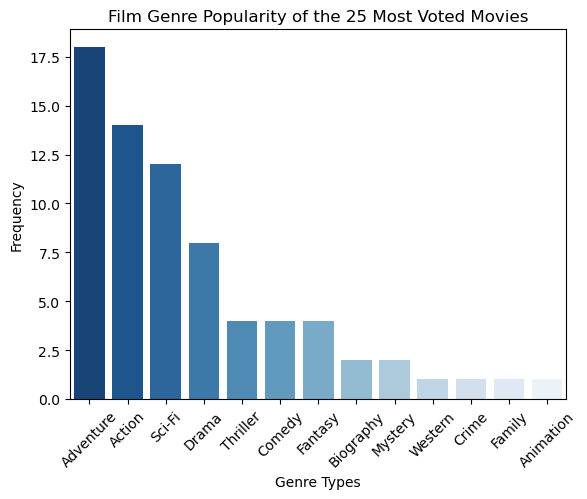

In [64]:
# Splitting the genres column into separate genres and counting the frequency of each genre
genres = df_secondary["genres"].str.split(",").explode()
genres_count = genres.value_counts()

# Setting the color palette to shades of blue, from dark to light
palette = sns.color_palette("Blues_r", len(genres_count))

# Plotting the bar graph
sns.barplot(x=genres_count.index, y=genres_count.values, palette=palette)
plt.xlabel("Genre Types")
plt.ylabel("Frequency")
plt.title("Film Genre Popularity of the 25 Most Voted Movies")
plt.xticks(rotation=45)
plt.show()

Even though many productions combine two or three types of genre, the winners are clearly Adventure, Action and Sci-Fi films. These are by far the most popular, and certainly the obviously best choice of a profitable investment in the film industry in our generation.  

How about the length?  Keep people entertained for a couple hours!

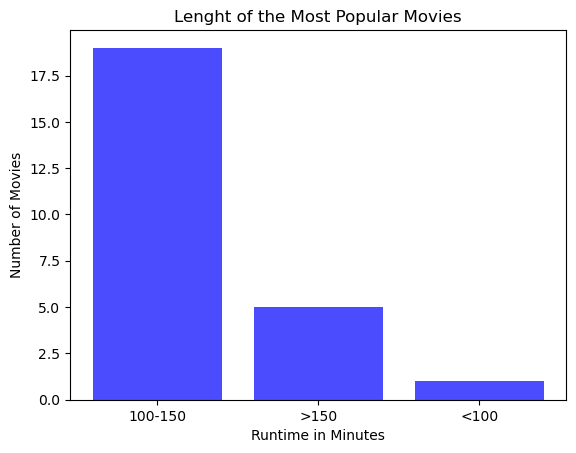

In [66]:
# Lets, again, look at the length of the films

# Now let's look at the length of each film vs its rating:

# Dividing the runtime into two groups: between 45 and 80 minutes, and outside of that interval
bins = [0, 100, 150, df['runtime_minutes'].max()]
labels = ['<100', '100-150', '>150']
df_secondary['runtime_group'] = pd.cut(df_secondary['runtime_minutes'], bins=bins, labels=labels)

# Counting the number of movies in each runtime group
group_counts = df_secondary['runtime_group'].value_counts()

# Creating the bar plot
plt.bar(group_counts.index, group_counts.values, color='blue', alpha=0.7)
plt.xlabel("Runtime in Minutes")
plt.ylabel("Number of Movies")
plt.title("Lenght of the Most Popular Movies")
plt.show()


# Conclusion

I understand the importance of presenting a well-rounded perspective to the Microsoft Board of Directors and ultimately, to Mr. Gates. As a visionary leader and philanthropist, he not only cares about the financial success of our company, but also his legacy and how he can benefit humanity through our endeavors.

With that in mind, I strongly recommend that we focus on producing Adventure, Action, and Sci-Fi movies. These genres have proven to be highly profitable in the film industry and offer a high potential for commercial success. By competing with the major players in Hollywood, we can establish Microsoft as a significant player in the film industry and achieve the financial goals we have set.

However, my early recommendation is that we not only focus on profitability, but also consider how we can use this opportunity to make a positive impact on society and align with Mr. Gates' mission of benefiting humanity. By exploring themes and storylines that raise awareness and drive positive change, we can create films that are both financially successful and leave a lasting impact on the world.

# Recomentations

Let Microsoft produce movies averaging two hours in length on the genres of Adventure, Action, and Sci-Fi.  May be a combination of two or all three genres. Once this show profitability, let Microsoft also produce shorter documentary films, 45 to 80 minutes in length.

# Next Steps